# Animations

For Degree of Equivalence demonstrations

In [1]:
from empir19nrm02.tools.help import label_font_size, save_fig
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
# plot a horizontal line with text
def plot_line( fig=None, ax=None, start=[0,0], end=[1,0], diff=0.01, text='test', color = 'r', ls='-'):
    ax.plot( [start[0], end[0]], [start[1], end[1]], color+ls)
    ax.plot( [start[0], start[0]], [start[1]-diff, start[1]+diff], color+ls)
    ax.plot( [end[0], end[0]], [end[1]-diff, end[1]+diff], color+ls)
    ax.text((start[0]+end[0])/2, start[1], text, va='bottom', ha='center')

# plot a guassian function with some text and markings
def plot_gauss( fig, ax, x=None, mean=0, std=1, markmean = True, meantext='$\mu$', markexpanded = True, textexpanded = '$U(x)$', color='r'):
    if x is None:
        x = np.linspace(-10,10,1000)
    y = np.exp(-(x - mean) ** 2 / (2 * std ** 2)) / (np.sqrt(2 * np.pi) * std)
    ax.plot(x,y, color+'-')
    if markmean:
        ax.text(mean,0.01, meantext, color = color, fontsize=label_font_size)
        ax.axvline(mean, color=color, ls='-.')
    if markexpanded:
        ax.fill_between(x, y, where=(np.abs(x - mean) <= 2*std), alpha=0.1, color=color, label='Expanded Uncertainty')
        ax.fill_between(x, y, where=(np.abs(x - mean) <= std), alpha=0.2, color=color, label='Uncertainty')
    return y


In [3]:
# plot a diagram (left side of the comparison)
def plot_left(fig=None, ax=None, x=None, mean=[0,1], std=[1,1], meantext=['',''], color=['r','g']):
    y0 = plot_gauss(fig=fig, ax=ax, x=x, mean=mean[0], std=std[0], meantext=meantext[0], color=color[0])
    y = plot_gauss(fig=fig, ax=ax, x=x, mean=mean[1], std=std[1], meantext=meantext[1], color=color[1])
    ax.set_ylim(0, max(y0) * 1.2)
    ax.set_xlabel('Value / A.U.', fontsize=label_font_size)
    ax.set_ylabel('Probability', fontsize=label_font_size)

# plot a diagram (right side of the comparison)
def plot_right(fig=None, ax=None, x=None, mean=[0,1], std=[1,1], meantext='', color='r'):
    ydiff = plot_gauss(fig=fig, ax=ax, x=x, mean=mean[1]-mean[0], std=np.sqrt(std[0]**2+std[1]**2), meantext=meantext, color=color)
    ax.set_xlabel('Difference Value / A.U.', fontsize=label_font_size)


# Generate a video with variing gauss functions to explain En-Score

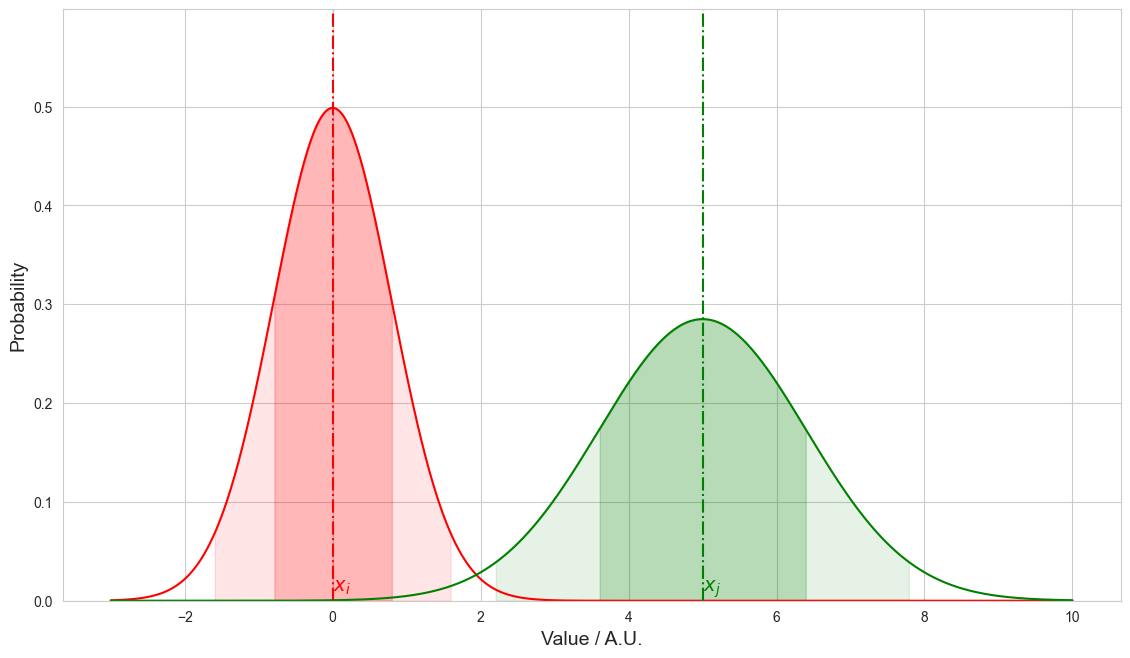

In [4]:
video_name = 'gausskurve.mp4'
frame_rate = 5
aspect_ratio = 16/9
vertical_res = 768
frame_size = (int(vertical_res*aspect_ratio), int(vertical_res))

# parameter for the gauss functions
std0 = 0.8
mean0 = 0
std = 1.4
mean_start = 5
mean_end = 0
step = 0.1
ylabel=0.51
ylabel1=0.55

# generate video writer
fourcc = cv2.VideoWriter_fourcc(*'X264')
#fourcc = cv2.VideoWriter_fourcc(*'MP4V')
video_writer = cv2.VideoWriter(video_name, fourcc, frame_rate, frame_size)

# calculate the number of frames
number_frames = int((mean_start - mean_end) / step) + 1

# caculate the x values
x = np.linspace(-3, 10, 1000)
x_diff = np.linspace(-3, 10, 1000)

fig, ax = plt.subplots(figsize=(frame_size[0]/100, frame_size[1]/100))
plot_left(fig=fig, ax=ax, x=x, mean=[mean0, mean_start], std=[std0, std], meantext=['$x_i$','$x_j$'], color=['r','g'])
save_fig('DoE', 'gauss')

for i in range(number_frames):
    mean = mean_start - i * step

    fig, ax = plt.subplots(1,2, figsize=(frame_size[0]/100, frame_size[1]/100), sharey=True)
    plot_left( fig=fig, ax=ax[0], x=x, mean=[mean0, mean], std=[std0, std], meantext=['$x_i$', '$x_j$'], color=['r', 'g'])

    plot_line(fig=fig, ax=ax[0], start=[mean0,ylabel], end=[mean, ylabel], text='$|x_j-x_i|$', color='k')
    sqrt_value = 2*np.sqrt((std0)**2+(std)**2)
    plot_line(fig=fig, ax=ax[0], start=[mean0,ylabel1], end=[mean0+sqrt_value, ylabel1], text='$\sqrt{U^2(x_i)+U^2(x_j)}$', color='k')

    plot_right( fig=fig, ax=ax[1], x=x_diff, mean=[mean0, mean], std=[std0, std], meantext='$x_j-x_i$', color='b')

    en_score = abs(mean-mean0)/sqrt_value;
    fig.suptitle(f'$E_n$ Score:{en_score:.1f}')

    #plt.show()
    #break

    # save the current frame
    plt.savefig('temp_frame.png')

    # load the current frame and save to the video
    frame = cv2.imread('temp_frame.png')
    frame = cv2.resize(frame, frame_size)
    # hold a bit for en=1
    if np.abs(en_score - 1) < 0.01:
        for i in range(20):
            video_writer.write(frame)
    else:
        video_writer.write(frame)

    # delete temp files
    plt.clf()
    plt.cla()
    plt.close()

# close videowirter
video_writer.release()
cv2.destroyAllWindows()

In [5]:
print('End')

End
